In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report 

In [2]:
#Importing Dataset
df = pd.read_csv("Zoo.csv") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
(101, 18)
        

In [ ]:
#Data Preprocessing
print("\nData Info : ")
print(df.info())
print("\nData Shape : ")
print(df.shape)
print("\nData Description : ")
print(df.describe()) 
print("\nInitial Values of data : ")
print(df.head()) 

df=df.drop("animal name",axis=1)

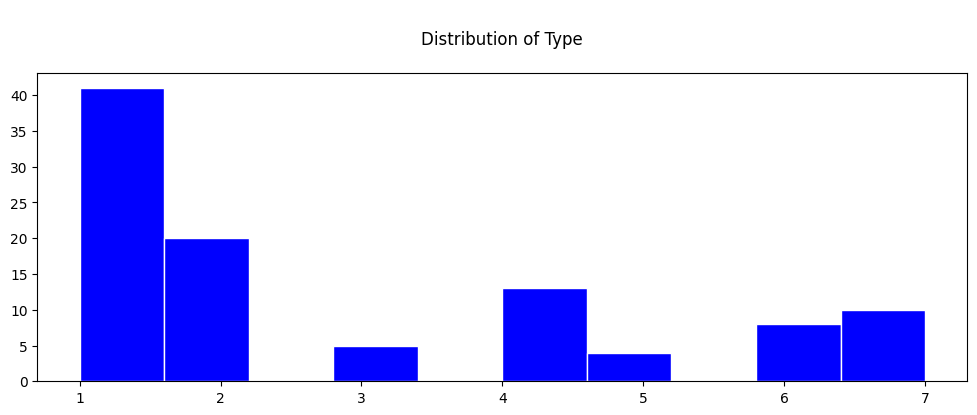

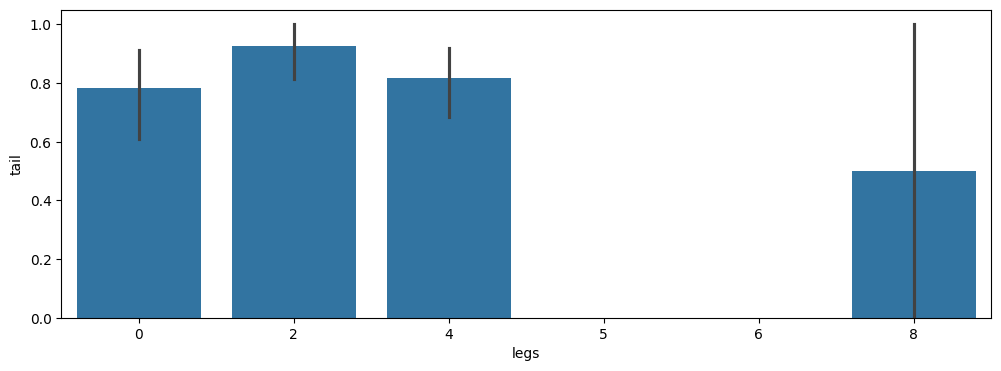

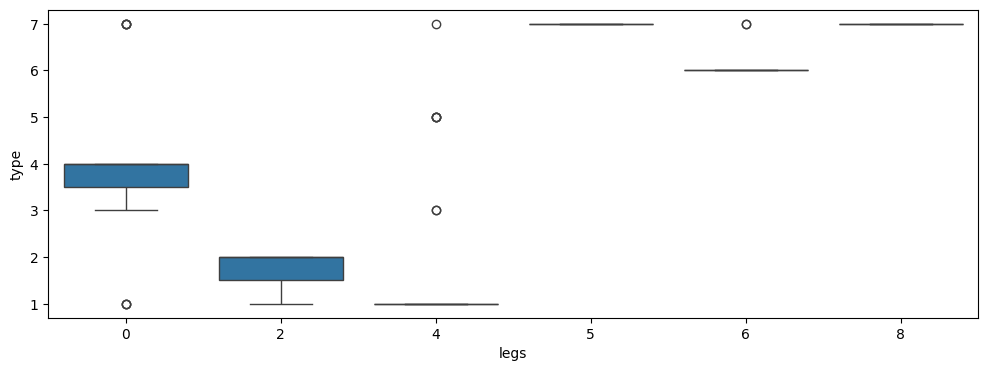

In [3]:
#Data Visualizations
plt.figure(figsize=(12,4)) 
plt.hist(df["type"],color="Blue",edgecolor="White") 
plt.title("\nDistribution of Type\n") 
plt.show() 

plt.figure(figsize=(12,4)) 
sns.barplot(x="legs",y="tail",data=df) 
plt.show() 

plt.figure(figsize=(12,4)) 
sns.boxplot(x="legs",y="type",data=df) 
plt.show()


Accuracy Score :  0.9047619047619048

Precision Score :  0.9047619047619048

Recall Score :  0.9047619047619048

F1 Score :  0.8957902001380263

Confusion Matrix : 
 [[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



C:\Users\Aarush\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Aarush\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Aarush\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

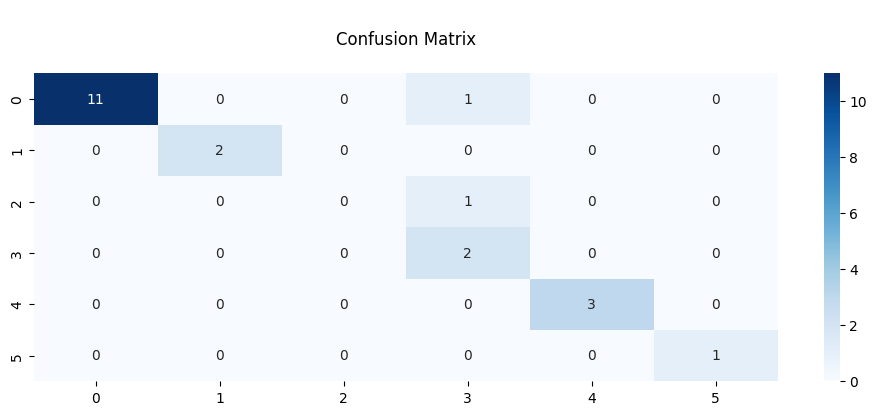

In [4]:
#Train-Test Split and KNN model creation 
num_features = list(df.select_dtypes(include=["int64","float64"]).columns)
num_features.remove("type")

X = df.drop("type",axis=1) 
y = df["type"].astype(int)

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print("\nAccuracy Score : ",accuracy_score(y_test,y_pred))
print("\nPrecision Score : ",precision_score(y_test,y_pred,average="weighted"))
print("\nRecall Score : ",recall_score(y_test,y_pred,average="weighted"))
print("\nF1 Score : ",f1_score(y_test,y_pred,average="weighted"))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n",classification_report(y_test,y_pred))

plt.figure(figsize=(12,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d")
plt.title("\nConfusion Matrix\n")
plt.show()

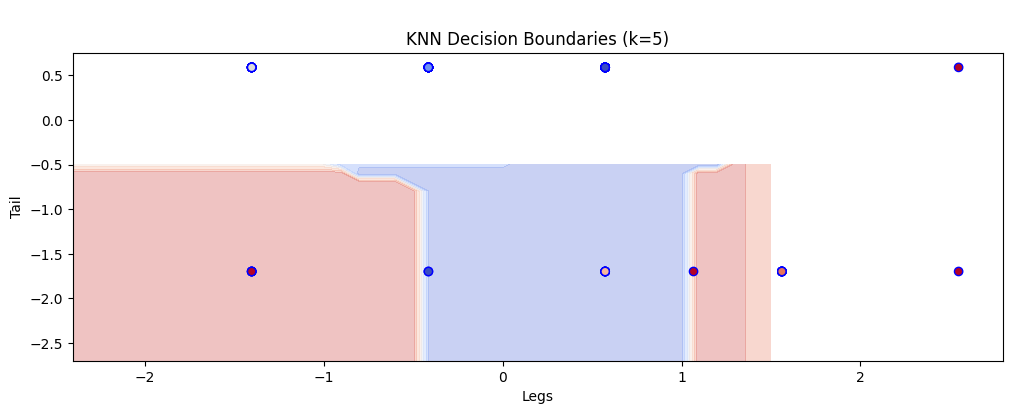

In [5]:
X_vis = df[["legs","tail"]].values
y_vis = df["type"].values

knn1 = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn1.fit(X_vis,y_vis)

y_pred1 = knn1.predict(X_test[["legs","tail"]].values)

xx,yy = np.meshgrid(np.arange(X_vis[:,0].min()-1,X_vis[:,0].max()-1,0.1),np.arange(X_vis[:,1].min()-1,X_vis[:,1].max()-1,0.1))
Z = knn1.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12,4))
plt.contourf(xx,yy,Z,alpha=0.3,cmap="coolwarm")
plt.scatter(X_vis[:,0],X_vis[:,1],c=y_vis,edgecolor="Blue",cmap="coolwarm")
plt.xlabel("Legs")
plt.ylabel("Tail")
plt.title("\nKNN Decision Boundaries (k=5)")
plt.show()

In [ ]:
"""1. What are the key hyperparameters in KNN? 

The main hyperparameter is k, the number of nearest neighbors.

Smaller k makes the model more flexible but increases noise.

Larger k smoothens the decision boundary but may cause underfitting.

Distance metric (e.g., Euclidean, Manhattan) is another hyperparameter.

Weighting scheme: uniform weights or distance-based weights.

Uniform treats all neighbors equally.

Distance-weighted gives closer points more influence.

Algorithm type: brute force or KD-Tree/Ball-Tree for faster search.

Leaf size affects tree-based search speed.

Feature scaling (not a hyperparameter) is also crucial for good performance.

2. What distance metrics can be used in KNN? 

The most common distance metric is Euclidean distance.

It measures straight-line distance in multi-dimensional space.

Manhattan distance measures distance along axes (L1 norm).

Minkowski distance generalizes both Euclidean (p=2) and Manhattan (p=1).

Hamming distance is used for categorical or binary data.

Cosine similarity measures the angle between vectors.

It's useful in text or high-dimensional data.

Chebyshev distance considers only the maximum coordinate difference.

Choice of metric affects decision boundary shape.

Distance metric selection depends on data type and problem characteristics."""